<a href="https://colab.research.google.com/github/MCHU2023/Riesgo_AC/blob/main/TP1/Proyecto_MBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Determinantes del riesgo de ataque cardíaco**

#### **Acerca de la base de datos**
El conjunto de datos consta de 8763 registros y 26 variables

#### **Carga de datos**

In [ ]:
import pandas as pd

In [ ]:
heart_a = pd.read_csv("/content/heart_attack_prediction_dataset.csv")
heart_a.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


#### **Eliminación de variables**
En la base de datos se identificó una columna denominada "Patient ID" que no contribuye significativamente al proceso analítico, por lo que se ha tomado la decisión de eliminarla del conjunto de datos.

In [ ]:
heart_a = heart_a.drop('Patient ID', axis=1)
heart_a.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


### **Renombrado de variables**

In [ ]:
heart_a.rename(columns={'Age': 'Edad', 'Sex': 'Género', 'Cholesterol': 'Colesterol','Blood Pressure':'Pres_art', 'Heart Rate': 'Freq cardiaca', 'Diabetes': 'Diabetes', 'Family History': 'Hist_familiar', 'Smoking': 'Fumador', 'Obesity': 'Obesidad', 'Alcohol Consumption': 'Cons_alcohol', 'Exercise Hours Per Week': 'He_xsemana', 'Diet': 'Dieta', 'Previous Heart Problems': 'Prob_cor_ant', 'Medication Use': 'Uso medicina', 'Stress Level': 'Nivel estrés', 'Sedentary Hours Per Day': 'HSeden_xdía', 'Income': 'Ingreso', 'BMI': 'IMC', 'Triglycerides': 'Triglicéridos', 'Physical Activity Days Per Week': 'DíasAF_xsemana', 'Sleep Hours Per Day': 'HSueño_xdía', 'Country': 'País', 'Continent': 'Continente', 'Hemisphere': 'Hemisferio', 'Heart Attack Risk': 'Riesgo AC'}, inplace=True)
print(heart_a)

      Edad  Género  Colesterol Pres_art  Freq cardiaca  Diabetes  \
0       67    Male         208   158/88             72         0   
1       21    Male         389   165/93             98         1   
2       21  Female         324   174/99             72         1   
3       84    Male         383  163/100             73         1   
4       66    Male         318    91/88             93         1   
...    ...     ...         ...      ...            ...       ...   
8758    60    Male         121    94/76             61         1   
8759    28  Female         120  157/102             73         1   
8760    47    Male         250   161/75            105         0   
8761    36    Male         178   119/67             60         1   
8762    25  Female         356   138/67             75         1   

      Hist_familiar  Fumador  Obesidad  Cons_alcohol  ...  HSeden_xdía  \
0                 0        1         0             0  ...     6.615001   
1                 1        1       



#### **Exploración de datos**

In [ ]:
heart_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Edad            8763 non-null   int64  
 1   Género          8763 non-null   object 
 2   Colesterol      8763 non-null   int64  
 3   Pres_art        8763 non-null   object 
 4   Freq cardiaca   8763 non-null   int64  
 5   Diabetes        8763 non-null   int64  
 6   Hist_familiar   8763 non-null   int64  
 7   Fumador         8763 non-null   int64  
 8   Obesidad        8763 non-null   int64  
 9   Cons_alcohol    8763 non-null   int64  
 10  He_xsemana      8763 non-null   float64
 11  Dieta           8763 non-null   object 
 12  Prob_cor_ant    8763 non-null   int64  
 13  Uso medicina    8763 non-null   int64  
 14  Nivel estrés    8763 non-null   int64  
 15  HSeden_xdía     8763 non-null   float64
 16  Ingreso         8763 non-null   int64  
 17  IMC             8763 non-null   f

Se identificó algunas columnas con datos tipo object. Para aplicar funciones estadísticas y de análisis se requiere que los datos sean de tipo numérico. Por lo que se debe convertir los datos object a int.

#### **Conversión de tipo de datos**




###### **1.Género**

In [ ]:
heart_a['Género'] = heart_a['Género'].replace({'Male':0, 'Female':1})
heart_a.head()

,Edad,Género,Colesterol,Pres_art,Freq cardiaca,Diabetes,Hist_familiar,Fumador,Obesidad,Cons_alcohol,...,HSeden_xdía,Ingreso,IMC,Triglicéridos,DíasAF_xsemana,HSueño_xdía,País,Continente,Hemisferio,Riesgo AC
0,67,0,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,0,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,1,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,0,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,0,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


###### **2.Presión arterial**

Es necesario convertir los datos a un formato numérico adecuado, lo que incluye dividir la presión arterial en sus componentes sistólicos y diastólicos.

In [ ]:
# Se divide la columna 'Pres_art' en dos nuevas columnas 'Sistólica' y 'Diastólica'
heart_a[['Sistólica', 'Diastólica']] = heart_a['Pres_art'].str.split('/', expand=True)

In [ ]:
# Se convierten las nuevas columnas a tipo numérico
heart_a['Sistólica'] = pd.to_numeric(heart_a['Sistólica'])
heart_a['Diastólica'] = pd.to_numeric(heart_a['Diastólica'])

In [ ]:
# Se elimina la columna Pres_art
heart_a = heart_a.drop('Pres_art', axis=1)
heart_a.head()

,Edad,Género,Colesterol,Freq cardiaca,Diabetes,Hist_familiar,Fumador,Obesidad,Cons_alcohol,He_xsemana,...,IMC,Triglicéridos,DíasAF_xsemana,HSueño_xdía,País,Continente,Hemisferio,Riesgo AC,Sistólica,Diastólica
0,67,0,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,0,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,1,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,0,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,0,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88


###### **3. Diet**

In [ ]:
heart_a['Dieta'].unique()

array(['Average', 'Unhealthy', 'Healthy'], dtype=object)

In [ ]:
heart_a['Dieta'] = heart_a['Dieta'].replace({'Unhealthy':0, 'Average':1, 'Healthy':2})
heart_a.head().T

,0,1,2,3,4
Edad,67,21,21,84,66
Género,0,0,1,0,0
Colesterol,208,389,324,383,318
Freq cardiaca,72,98,72,73,93
Diabetes,0,1,1,1,1
Hist_familiar,0,1,0,1,1
Fumador,1,1,0,1,1
Obesidad,0,1,0,0,1
Cons_alcohol,0,1,0,1,0
He_xsemana,4.168189,1.813242,2.078353,9.82813,5.804299


###### **4. Country**
Se asigna un número a cada país

In [ ]:
heart_a['País'].unique()

array(['Argentina', 'Canada', 'France', 'Thailand', 'Germany', 'Japan',
       'Brazil', 'South Africa', 'United States', 'Vietnam', 'China',
       'Italy', 'Spain', 'India', 'Nigeria', 'New Zealand', 'South Korea',
       'Australia', 'Colombia', 'United Kingdom'], dtype=object)

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

heart_a['País']= label_encoder.fit_transform(heart_a['País'])
heart_a.head()

,Edad,Género,Colesterol,Freq cardiaca,Diabetes,Hist_familiar,Fumador,Obesidad,Cons_alcohol,He_xsemana,...,IMC,Triglicéridos,DíasAF_xsemana,HSueño_xdía,País,Continente,Hemisferio,Riesgo AC,Sistólica,Diastólica
0,67,0,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,0,South America,Southern Hemisphere,0,158,88
1,21,0,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,3,North America,Northern Hemisphere,0,165,93
2,21,1,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,6,Europe,Northern Hemisphere,0,174,99
3,84,0,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,3,North America,Northern Hemisphere,0,163,100
4,66,0,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,16,Asia,Northern Hemisphere,0,91,88


###### **5. Continent**
Se asigna un número a cada continente

In [ ]:
heart_a['Continente'].unique()

array(['South America', 'North America', 'Europe', 'Asia', 'Africa',
       'Australia'], dtype=object)

In [ ]:
heart_a['Continente']= label_encoder.fit_transform(heart_a['Continente'])
heart_a.head()

,Edad,Género,Colesterol,Freq cardiaca,Diabetes,Hist_familiar,Fumador,Obesidad,Cons_alcohol,He_xsemana,...,IMC,Triglicéridos,DíasAF_xsemana,HSueño_xdía,País,Continente,Hemisferio,Riesgo AC,Sistólica,Diastólica
0,67,0,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,0,5,Southern Hemisphere,0,158,88
1,21,0,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,3,4,Northern Hemisphere,0,165,93
2,21,1,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,6,3,Northern Hemisphere,0,174,99
3,84,0,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,3,4,Northern Hemisphere,0,163,100
4,66,0,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,16,1,Northern Hemisphere,0,91,88


###### **6. Hemisphere**
Se asigna un número a cada hemisferio

In [ ]:
heart_a['Hemisferio'].unique()

array(['Southern Hemisphere', 'Northern Hemisphere'], dtype=object)

In [ ]:
heart_a['Hemisferio']= label_encoder.fit_transform(heart_a['Hemisferio'])
heart_a.head()

,Edad,Género,Colesterol,Freq cardiaca,Diabetes,Hist_familiar,Fumador,Obesidad,Cons_alcohol,He_xsemana,...,IMC,Triglicéridos,DíasAF_xsemana,HSueño_xdía,País,Continente,Hemisferio,Riesgo AC,Sistólica,Diastólica
0,67,0,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,0,5,1,0,158,88
1,21,0,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,3,4,0,0,165,93
2,21,1,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,6,3,0,0,174,99
3,84,0,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,3,4,0,0,163,100
4,66,0,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,16,1,0,0,91,88


#### **Datos**

**Análisis exploratorio**

In [ ]:
heart_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Edad            8763 non-null   int64  
 1   Género          8763 non-null   int64  
 2   Colesterol      8763 non-null   int64  
 3   Freq cardiaca   8763 non-null   int64  
 4   Diabetes        8763 non-null   int64  
 5   Hist_familiar   8763 non-null   int64  
 6   Fumador         8763 non-null   int64  
 7   Obesidad        8763 non-null   int64  
 8   Cons_alcohol    8763 non-null   int64  
 9   He_xsemana      8763 non-null   float64
 10  Dieta           8763 non-null   int64  
 11  Prob_cor_ant    8763 non-null   int64  
 12  Uso medicina    8763 non-null   int64  
 13  Nivel estrés    8763 non-null   int64  
 14  HSeden_xdía     8763 non-null   float64
 15  Ingreso         8763 non-null   int64  
 16  IMC             8763 non-null   float64
 17  Triglicéridos   8763 non-null   i

**Gráfico de cajas**

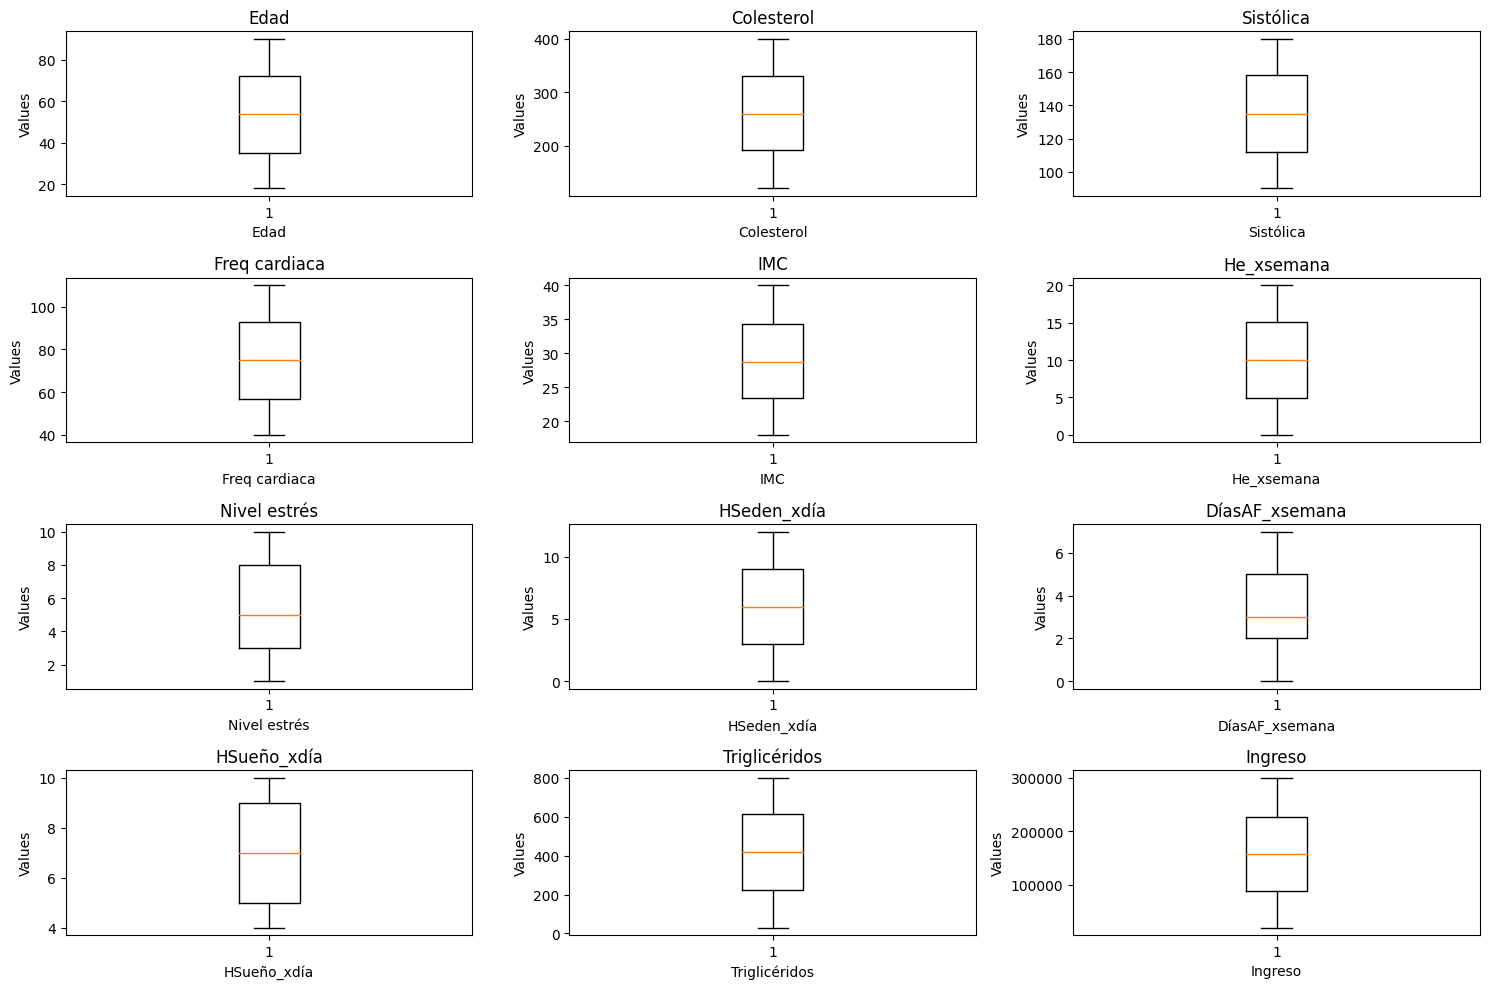

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a list of columns for which we want to generate box plots
columns = ['Edad', 'Colesterol', 'Sistólica', 'Freq cardiaca', 'IMC',
                             'He_xsemana', 'Nivel estrés', 'HSeden_xdía',
                             'DíasAF_xsemana', 'HSueño_xdía', 'Triglicéridos', 'Ingreso']

# Create box plots for the selected columns
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    plt.boxplot(heart_a[column].dropna())
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()


**Estadísticos descriptivos**

In [ ]:
heart_a.describe()

,Edad,Género,Colesterol,Freq cardiaca,Diabetes,Hist_familiar,Fumador,Obesidad,Cons_alcohol,He_xsemana,...,IMC,Triglicéridos,DíasAF_xsemana,HSueño_xdía,País,Continente,Hemisferio,Riesgo AC,Sistólica,Diastólica
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,0.302636,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,...,28.891446,417.677051,3.489672,7.023508,9.382175,2.428849,0.354102,0.358211,135.075659,85.156111
std,21.249509,0.459425,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,...,6.319181,223.748137,2.282687,1.988473,5.788964,1.597561,0.478268,0.479502,26.349976,14.676565
min,18.000000,0.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,...,18.002337,30.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000
25%,35.000000,0.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,...,23.422985,225.500000,2.000000,5.000000,4.000000,1.000000,0.000000,0.000000,112.000000,72.000000
50%,54.000000,0.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,...,28.768999,417.000000,3.000000,7.000000,9.000000,3.000000,0.000000,0.000000,135.000000,85.000000
75%,72.000000,1.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,...,34.324594,612.000000,5.000000,9.000000,14.000000,4.000000,1.000000,1.000000,158.000000,98.000000
max,90.000000,1.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,...,39.997211,800.000000,7.000000,10.000000,19.000000,5.000000,1.000000,1.000000,180.000000,110.000000


#### **Matriz de correlación**

In [ ]:
correlation_table = heart_a.corr()
print(correlation_table)

                    Edad    Género  Colesterol  Freq cardiaca  Diabetes  \
Edad            1.000000 -0.020067   -0.009107      -0.003844 -0.014105   
Género         -0.020067  1.000000   -0.007614       0.010921 -0.003582   
Colesterol     -0.009107 -0.007614    1.000000       0.000315 -0.013428   
Freq cardiaca  -0.003844  0.010921    0.000315       1.000000  0.006764   
Diabetes       -0.014105 -0.003582   -0.013428       0.006764  1.000000   
Hist_familiar   0.008353 -0.002180   -0.021608      -0.013470 -0.013844   
Fumador         0.394891 -0.514837    0.016342      -0.012331  0.000527   
Obesidad       -0.008140 -0.002376   -0.014843       0.012725  0.012866   
Cons_alcohol   -0.006666 -0.002085   -0.007261       0.003459  0.005551   
He_xsemana      0.001206  0.006976    0.021517       0.008276 -0.007014   
Dieta          -0.013230 -0.005740   -0.010765      -0.003014  0.006156   
Prob_cor_ant    0.000868 -0.001964   -0.006070      -0.004956  0.000867   
Uso medicina    0.000980 

##### **Principales resultados**

**Variables relacionadas positivamente con el riesgo de ataque cardíaco:**


* **Edad:** La edad parece tener una correlación positiva muy leve con el riesgo de ataque cardíaco.

* **Niveles de colesterol:** Aunque la correlación es débil, los niveles de colesterol también están ligeramente relacionados de forma positiva con el riesgo de ataque cardíaco.

* **Presión arterial sistólica:** La presión arterial sistólica muestra una correlación positiva moderada con el riesgo de ataque cardíaco.


**Variables relacionadas negativamente con el riesgo de ataque cardíaco:**

* **Actividad física:** El número de horas de actividad física por semana muestra una correlación negativa débil con el riesgo de ataque cardíaco.

* **Ingesta de alcohol:** La correlación con la ingesta de alcohol es negativa, aunque muy débil.


##### **Mapa de Calor de Correlación**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix


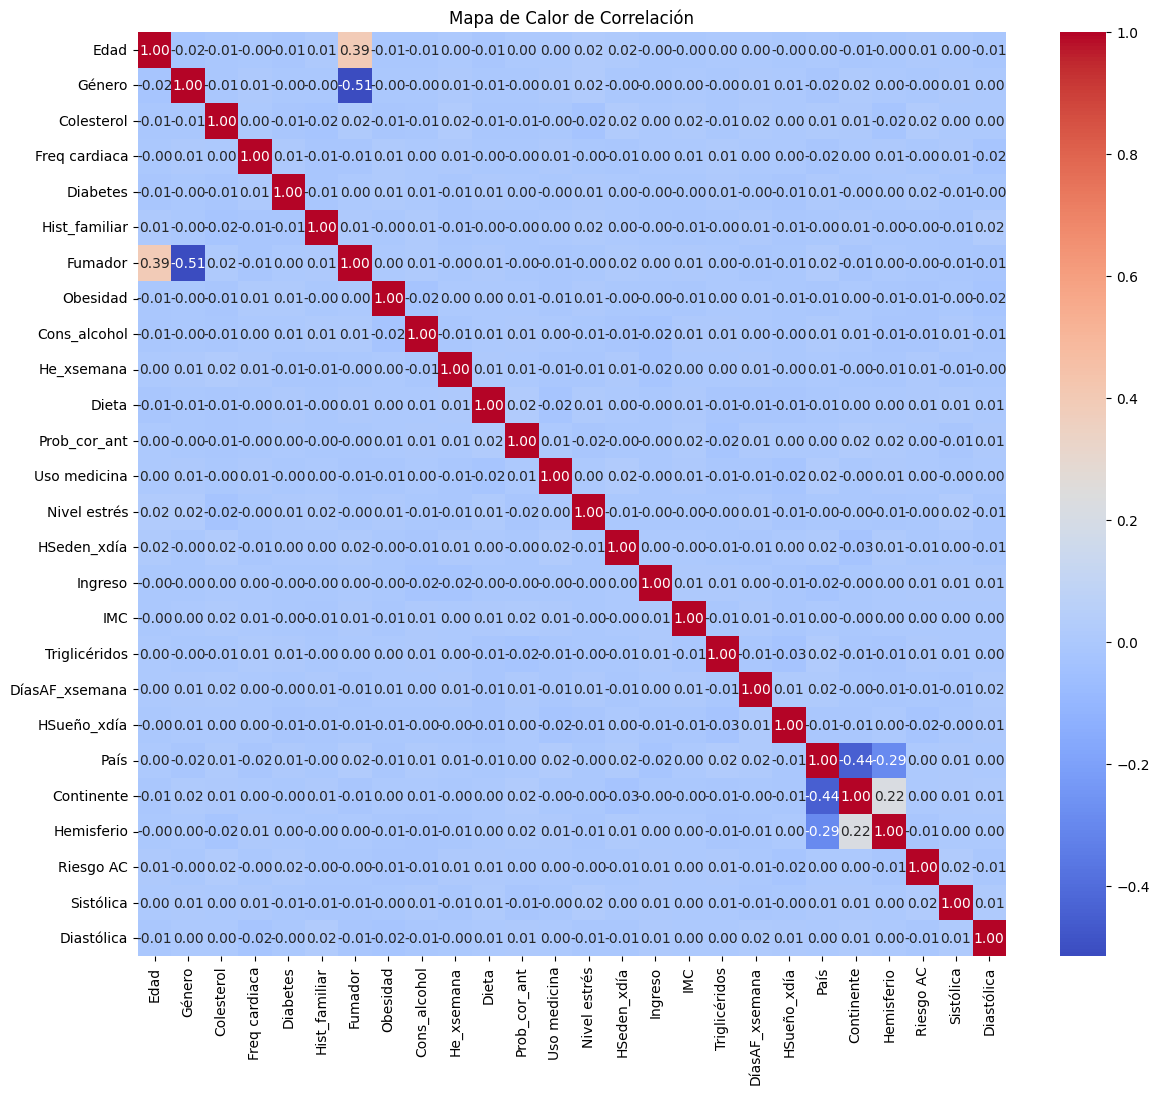

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(heart_a.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()


##### **Histograma de distribución**

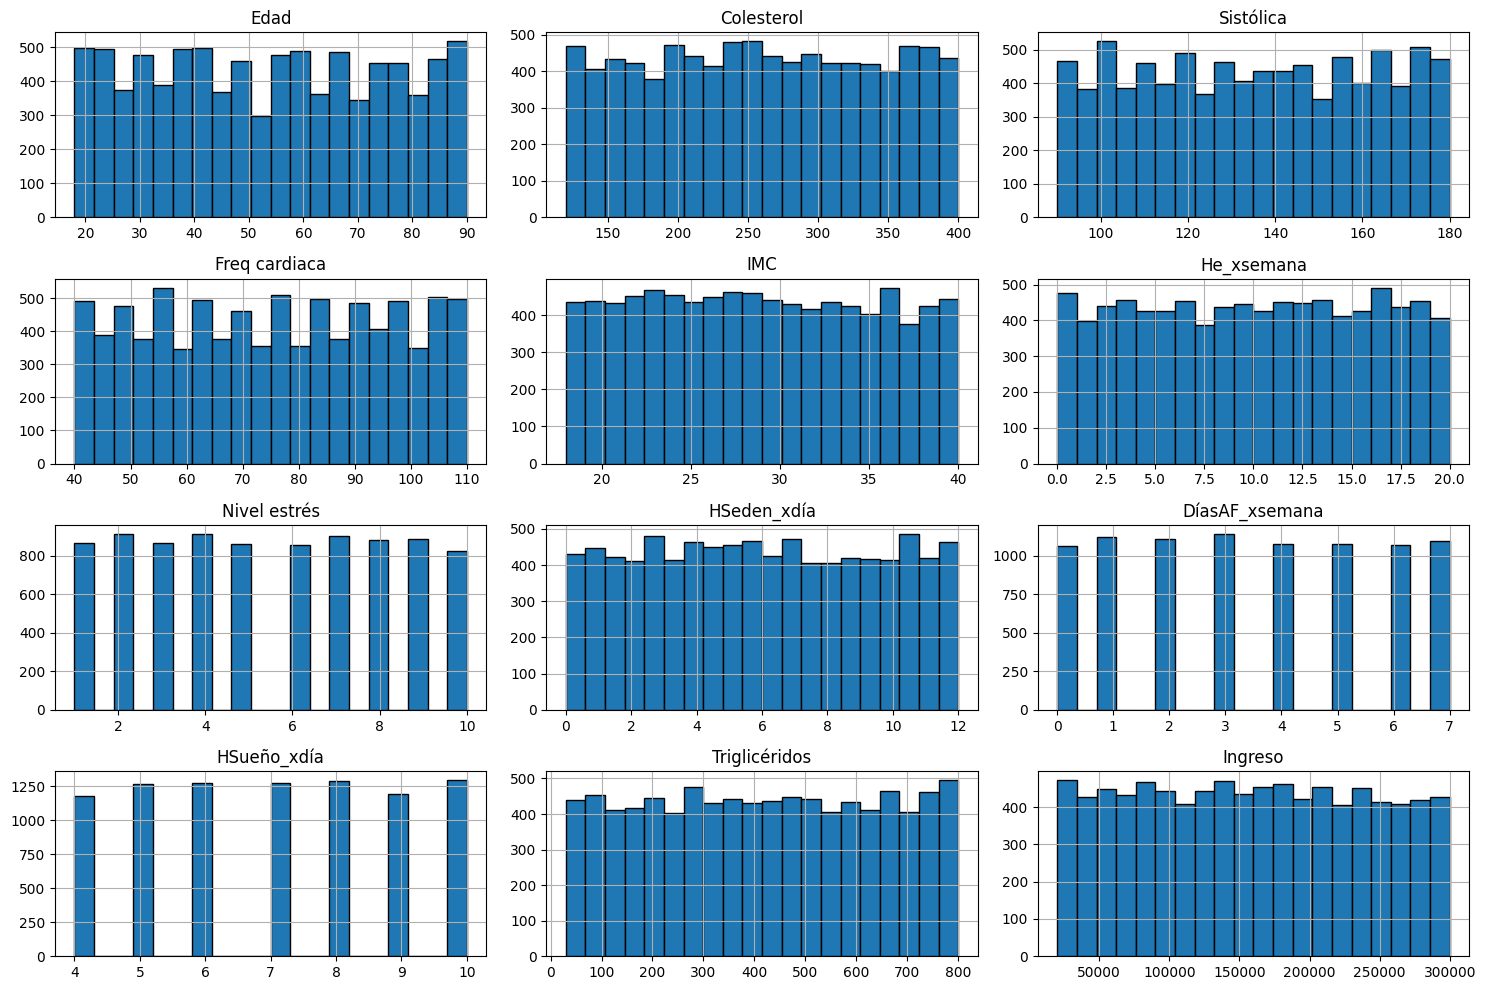

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Seleccionar columnas relevantes para gráficos de caja
columns_to_plot_corrected = ['Edad', 'Colesterol', 'Sistólica', 'Freq cardiaca', 'IMC',
                             'He_xsemana', 'Nivel estrés', 'HSeden_xdía',
                             'DíasAF_xsemana', 'HSueño_xdía', 'Triglicéridos', 'Ingreso']

# Crear histogramas para las columnas seleccionadas
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot_corrected, 1):
    plt.subplot(4, 3, i)
    heart_a[column].hist(bins=20, edgecolor='black')
    plt.title(column)

plt.tight_layout()
plt.show()


**Análisis bivariado**

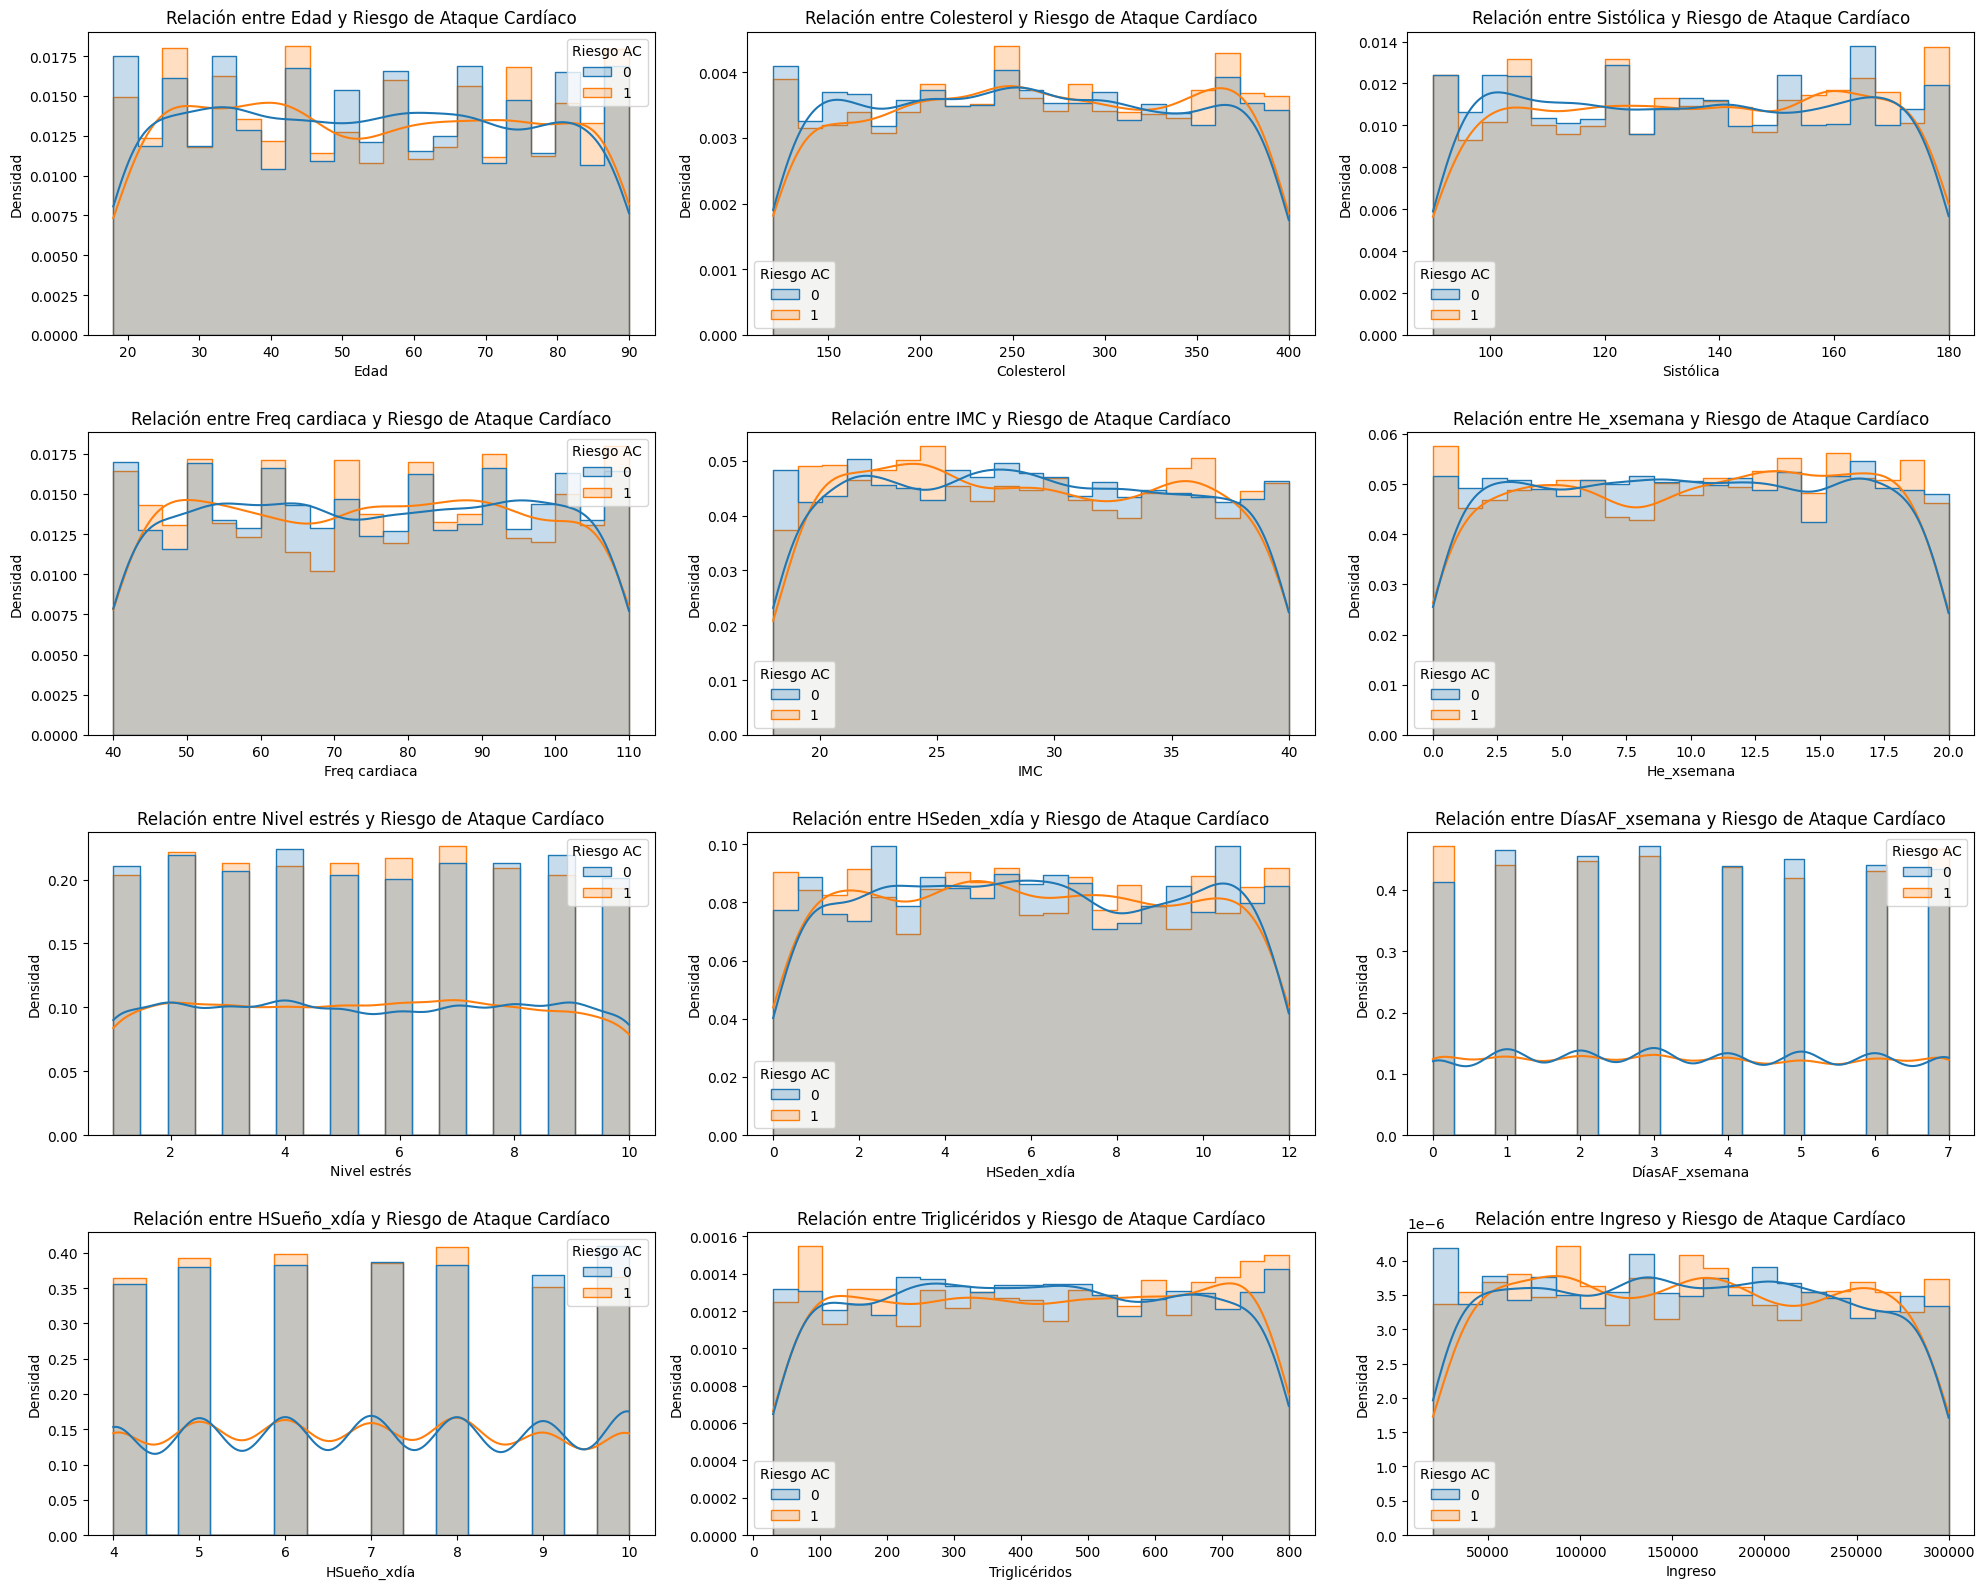

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Crear gráficos para un análisis bivariado con relación al riesgo de ataque cardíaco
# Lista de columnas a analizar en relación con el riesgo de ataque cardíaco
columns_to_analyze = ['Edad', 'Colesterol', 'Sistólica', 'Freq cardiaca', 'IMC',
                             'He_xsemana', 'Nivel estrés', 'HSeden_xdía',
                             'DíasAF_xsemana', 'HSueño_xdía', 'Triglicéridos', 'Ingreso']

# Calcular el número de filas necesarias para la cuadrícula
num_columns = 3
num_rows = (len(columns_to_analyze) + 1) // num_columns

# Crear gráficos
plt.figure(figsize=(20, 4 * num_rows))
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.histplot(heart_a, x=column, hue='Riesgo AC', kde=True, element="step", stat="density", common_norm=False)
    plt.title(f'Relación entre {column} y Riesgo de Ataque Cardíaco')
    plt.xlabel(column)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()


**Riesgo de ataque cardíaco por país**

<ipython-input-27-2e6779a1a022>:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


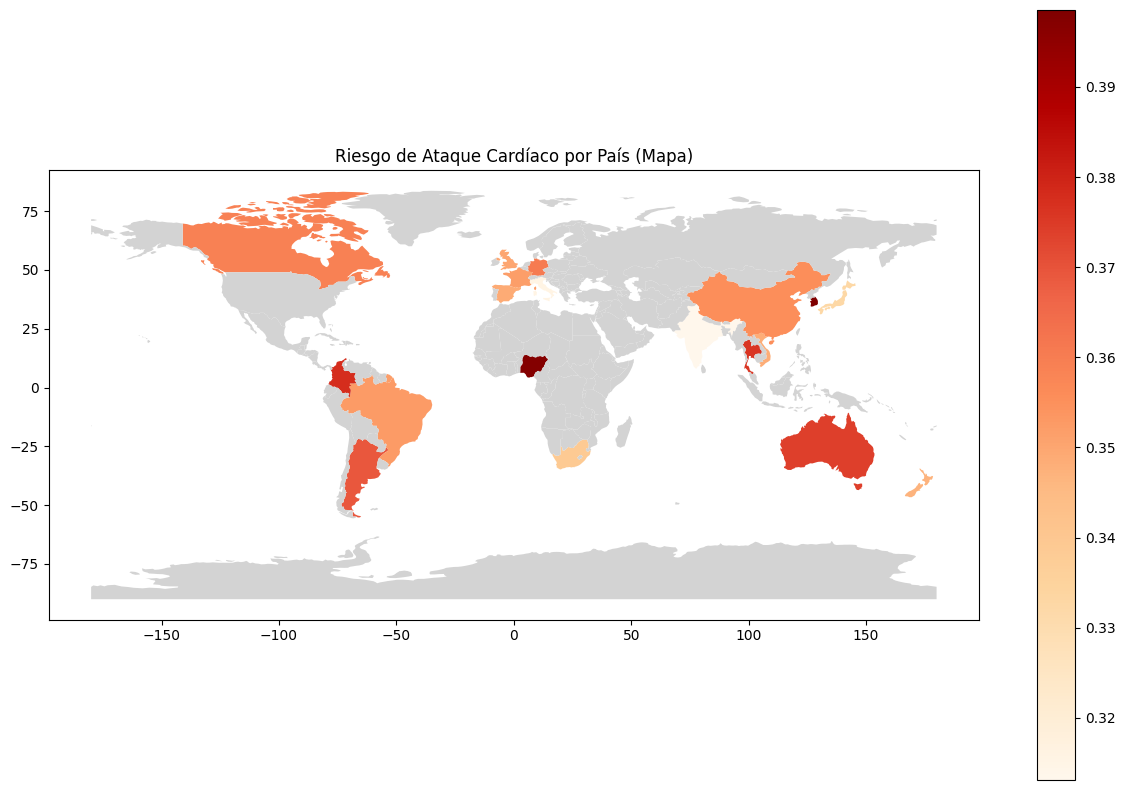

In [ ]:
pais_data = pd.read_csv('/content/heart_attack_prediction_dataset.csv')

# Crear un resumen del riesgo de ataque cardiaco por país
risk_by_country = pais_data.groupby('Country')['Heart Attack Risk'].mean().reset_index()


# Mapa
import geopandas as gpd

# Supongamos que tenemos un GeoDataFrame con los datos de países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.set_index('name').join(risk_by_country.set_index('Country'))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Heart Attack Risk', ax=ax, legend=True, cmap='OrRd', missing_kwds={'color': 'lightgrey'})
plt.title('Riesgo de Ataque Cardíaco por País (Mapa)')
plt.show()

# **Aplicación de modelos**

## **1. BOSQUE ALEATORIO**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Seleccionar las características y la variable objetivo
X = heart_a.drop('Riesgo AC', axis=1)
y = heart_a['Riesgo AC']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.6411865373645179
Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.33      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.49      0.50      0.39      1753
weighted avg       0.53      0.64      0.50      1753



## **1.1 BOSQUE ALEATORIO AJUSTADO**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Seleccionar las características y la variable objetivo
X = heart_a.drop('Riesgo AC', axis=1)
y = heart_a['Riesgo AC']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1_weighted')

# Fit GridSearchCV on the SMOTE-balanced training data
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the RandomForestClassifier with the best parameters
best_clf = RandomForestClassifier(**best_params, random_state=42)
best_clf.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_best = best_clf.predict(X_test)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)

# Print results
print("Best Parameters:", best_params)
print("Best Grid Search Score:", best_score)
print(f"Accuracy: {accuracy_best}")
print(f"Classification Report:\n{report_best}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 

**Matriz de confusión**

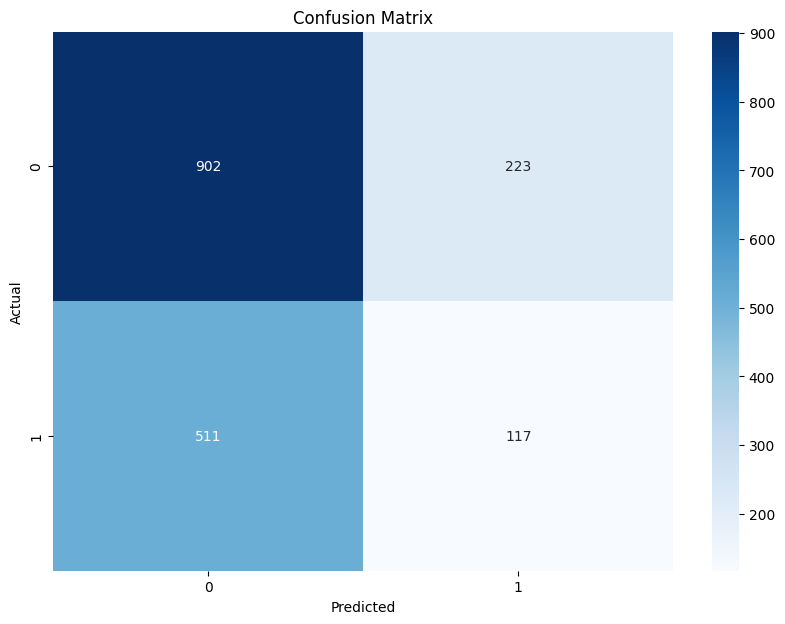

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Importancia de las características**

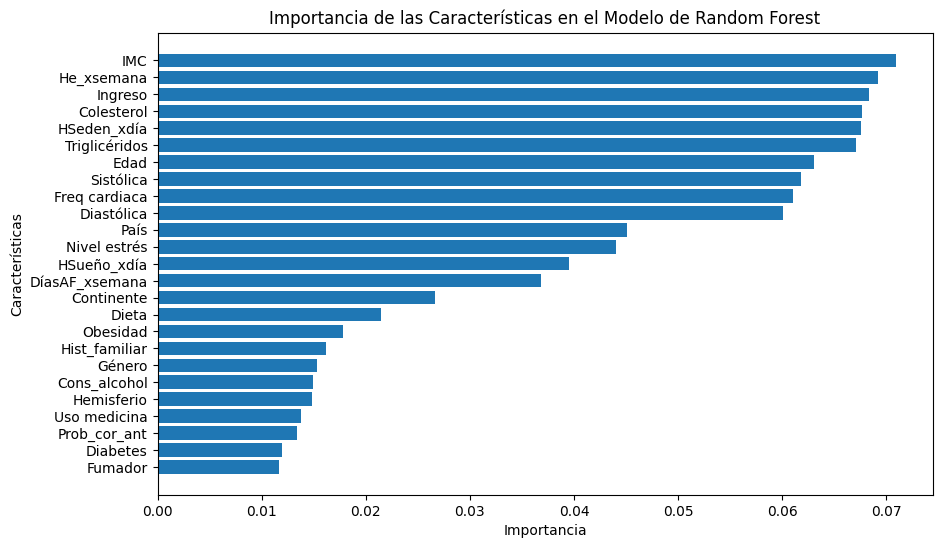

In [ ]:
feature_importances = best_clf.feature_importances_ # Changed best_model to best_clf
feature_names = X.columns  # Asumiendo que X es un DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características en el Modelo de Random Forest')
plt.gca().invert_yaxis()
plt.show()

## **REDES NEURONALES**

### **RED NEURONAL CON UNA CAPA**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Separar las características (X) y la variable objetivo (y)
X = heart_a.drop('Riesgo AC', axis=1)
y = heart_a['Riesgo AC']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal con una sola capa oculta
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluar el modelo
evaluation = model.evaluate(X_test_scaled, y_test)
print(f"Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")
# Calcular métricas
report = classification_report(y_test, y_pred)

print(report)



Epoch 1/50
220/220 [==============================] - 6s 20ms/step - loss: 0.7256 - accuracy: 0.5642 - val_loss: 0.6609 - val_accuracy: 0.6349
Epoch 2/50
220/220 [==============================] - 3s 13ms/step - loss: 0.6809 - accuracy: 0.6108 - val_loss: 0.6573 - val_accuracy: 0.6406
Epoch 3/50
220/220 [==============================] - 2s 10ms/step - loss: 0.6752 - accuracy: 0.6155 - val_loss: 0.6574 - val_accuracy: 0.6418
Epoch 4/50
220/220 [==============================] - 2s 9ms/step - loss: 0.6613 - accuracy: 0.6302 - val_loss: 0.6572 - val_accuracy: 0.6418
Epoch 5/50
220/220 [==============================] - 2s 8ms/step - loss: 0.6572 - accuracy: 0.6377 - val_loss: 0.6565 - val_accuracy: 0.6418
Epoch 6/50
220/220 [==============================] - 2s 9ms/step - loss: 0.6527 - accuracy: 0.6392 - val_loss: 0.6559 - val_accuracy: 0.6418
Epoch 7/50
220/220 [==============================] - 1s 6ms/step - loss: 0.6544 - accuracy: 0.6414 - val_loss: 0.6564 - val_accuracy: 0.6418
Epo

### **RED NEURONAL CON DOS CAPAS**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Separar las características (X) y la variable objetivo (y)
X = heart_a.drop('Riesgo AC', axis=1)
y = heart_a['Riesgo AC']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal con dos capas ocultas
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluar el modelo
evaluation = model.evaluate(X_test_scaled, y_test)
print(f"Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")

# Importar métricas de clasificación
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones sobre el conjunto de prueba
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))


Epoch 1/50
220/220 [==============================] - 7s 11ms/step - loss: 0.7002 - accuracy: 0.5890 - val_loss: 0.6611 - val_accuracy: 0.6412
Epoch 2/50
220/220 [==============================] - 2s 9ms/step - loss: 0.6716 - accuracy: 0.6203 - val_loss: 0.6620 - val_accuracy: 0.6418
Epoch 3/50
220/220 [==============================] - 2s 8ms/step - loss: 0.6603 - accuracy: 0.6375 - val_loss: 0.6600 - val_accuracy: 0.6418
Epoch 4/50
220/220 [==============================] - 2s 7ms/step - loss: 0.6572 - accuracy: 0.6415 - val_loss: 0.6599 - val_accuracy: 0.6418
Epoch 5/50
220/220 [==============================] - 1s 7ms/step - loss: 0.6567 - accuracy: 0.6418 - val_loss: 0.6593 - val_accuracy: 0.6418
Epoch 6/50
220/220 [==============================] - 2s 8ms/step - loss: 0.6566 - accuracy: 0.6417 - val_loss: 0.6574 - val_accuracy: 0.6418
Epoch 7/50
220/220 [==============================] - 2s 9ms/step - loss: 0.6538 - accuracy: 0.6421 - val_loss: 0.6566 - val_accuracy: 0.6418
Epoch

### **RED NEURONAL CON TRES CAPAS**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Separar las características (X) y la variable objetivo (y)
X = heart_a.drop('Riesgo AC', axis=1)
y = heart_a['Riesgo AC']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para oversampling de la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal con tres capas ocultas
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo con una tasa de aprendizaje personalizada
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con más épocas y un tamaño de lote ajustado
history = model.fit(X_train_scaled, y_train_resampled, epochs=100, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluar el modelo
evaluation = model.evaluate(X_test_scaled, y_test)
print(f"Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")

# Importar métricas de clasificación
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones sobre el conjunto de prueba
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))


Epoch 1/100
563/563 [==============================] - 4s 5ms/step - loss: 0.7006 - accuracy: 0.5281 - val_loss: 0.6823 - val_accuracy: 0.5659
Epoch 2/100
563/563 [==============================] - 3s 5ms/step - loss: 0.6806 - accuracy: 0.5683 - val_loss: 0.6859 - val_accuracy: 0.5539
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 0.6681 - accuracy: 0.5879 - val_loss: 0.6922 - val_accuracy: 0.5579
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 0.6613 - accuracy: 0.6018 - val_loss: 0.6973 - val_accuracy: 0.5590
Epoch 5/100
563/563 [==============================] - 2s 3ms/step - loss: 0.6565 - accuracy: 0.6091 - val_loss: 0.7025 - val_accuracy: 0.5590
Epoch 6/100
563/563 [==============================] - 1s 3ms/step - loss: 0.6518 - accuracy: 0.6099 - val_loss: 0.7016 - val_accuracy: 0.5665
Epoch 7/100
563/563 [==============================] - 1s 3ms/step - loss: 0.6425 - accuracy: 0.6219 - val_loss: 0.7045 - val_accuracy: 0.5705

### **MODELO DE RED NEURONAL CON CUATRO CAPAS**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Separar las características (X) y la variable objetivo (y)
X = heart_a.drop('Riesgo AC', axis=1)
y = heart_a['Riesgo AC']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para oversampling de la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal con cuatro capas ocultas
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo con una tasa de aprendizaje personalizada
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con más épocas y un tamaño de lote ajustado
history = model.fit(X_train_scaled, y_train_resampled, epochs=100, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluar el modelo
evaluation = model.evaluate(X_test_scaled, y_test)
print(f"Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")

# Importar métricas de clasificación
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones sobre el conjunto de prueba
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))


Epoch 1/100
563/563 [==============================] - 3s 3ms/step - loss: 0.7124 - accuracy: 0.5023 - val_loss: 0.6874 - val_accuracy: 0.5716
Epoch 2/100
563/563 [==============================] - 2s 3ms/step - loss: 0.6959 - accuracy: 0.5201 - val_loss: 0.6877 - val_accuracy: 0.5585
Epoch 3/100
563/563 [==============================] - 2s 4ms/step - loss: 0.6868 - accuracy: 0.5413 - val_loss: 0.6882 - val_accuracy: 0.5585
Epoch 4/100
563/563 [==============================] - 3s 5ms/step - loss: 0.6819 - accuracy: 0.5495 - val_loss: 0.6876 - val_accuracy: 0.5693
Epoch 5/100
563/563 [==============================] - 2s 3ms/step - loss: 0.6730 - accuracy: 0.5835 - val_loss: 0.6877 - val_accuracy: 0.5699
Epoch 6/100
563/563 [==============================] - 2s 3ms/step - loss: 0.6654 - accuracy: 0.5914 - val_loss: 0.6918 - val_accuracy: 0.5756
Epoch 7/100
563/563 [==============================] - 2s 3ms/step - loss: 0.6605 - accuracy: 0.5999 - val_loss: 0.6930 - val_accuracy: 0.5819

### **MODELO DE RED NEURONAL CON CINCO CAPAS**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Separar las características (X) y la variable objetivo (y)
X = heart_a.drop('Riesgo AC', axis=1)
y = heart_a['Riesgo AC']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para oversampling de la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Definir la arquitectura de la red neuronal con cinco capas ocultas
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo con una tasa de aprendizaje personalizada
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con más épocas y un tamaño de lote ajustado
history = model.fit(X_train_scaled, y_train_resampled, epochs=100, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluar el modelo
evaluation = model.evaluate(X_test_scaled, y_test)
print(f"Loss: {evaluation[0]}, Accuracy: {evaluation[1]}")

# Importar métricas de clasificación
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones sobre el conjunto de prueba
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred))


Epoch 1/100
563/563 [==============================] - 9s 9ms/step - loss: 0.7082 - accuracy: 0.5042 - val_loss: 0.6915 - val_accuracy: 0.5750
Epoch 2/100
563/563 [==============================] - 2s 4ms/step - loss: 0.6948 - accuracy: 0.5166 - val_loss: 0.6886 - val_accuracy: 0.6149
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 0.6912 - accuracy: 0.5247 - val_loss: 0.6893 - val_accuracy: 0.5870
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 0.6835 - accuracy: 0.5493 - val_loss: 0.6901 - val_accuracy: 0.5699
Epoch 5/100
563/563 [==============================] - 2s 3ms/step - loss: 0.6767 - accuracy: 0.5696 - val_loss: 0.6937 - val_accuracy: 0.5630
Epoch 6/100
563/563 [==============================] - 2s 4ms/step - loss: 0.6695 - accuracy: 0.5830 - val_loss: 0.6906 - val_accuracy: 0.5756
Epoch 7/100
563/563 [==============================] - 3s 5ms/step - loss: 0.6623 - accuracy: 0.5928 - val_loss: 0.6900 - val_accuracy: 0.5733

## **MATRIZ DE CONFUSIÓN DE LA RED NEURONAL DE CUATRO CAPAS**

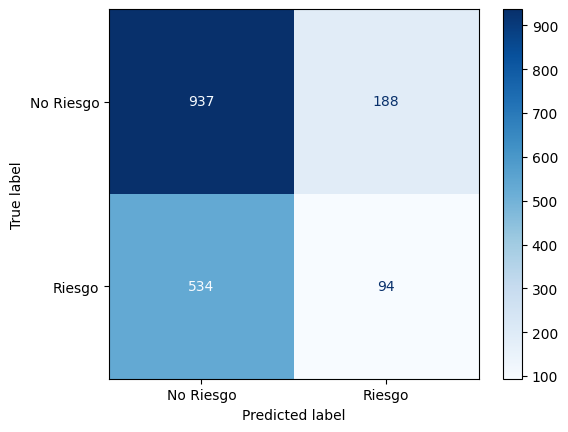

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Riesgo', 'Riesgo'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


## **ESTRUCTURA DE LA RED NEURONAL**

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               3328      
                                                                 
 dropout_31 (Dropout)        (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dropout_32 (Dropout)        (None, 64)                0         
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dropout_33 (Dropout)        (None, 32)                0         
                                                                 
 dense_45 (Dense)            (None, 16)              

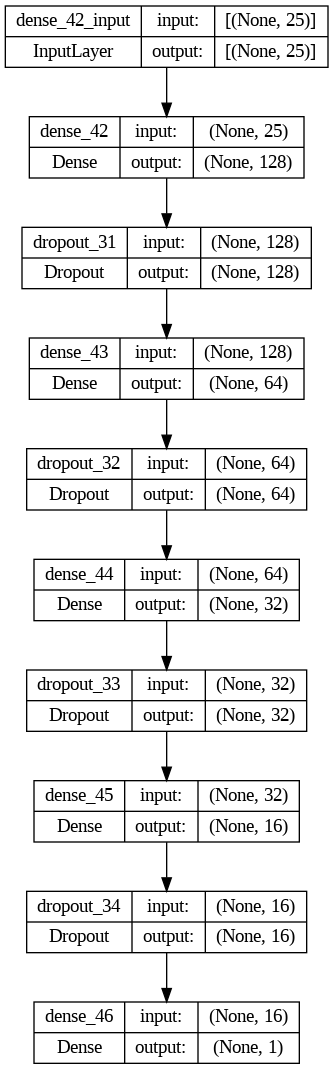

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Generar la estructura de la red neuronal
model.summary()

# Guardar la estructura de la red neuronal en un archivo de imagen
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

## **CURVA DE PÉRDIDA DE ENTRENAMIENTO**

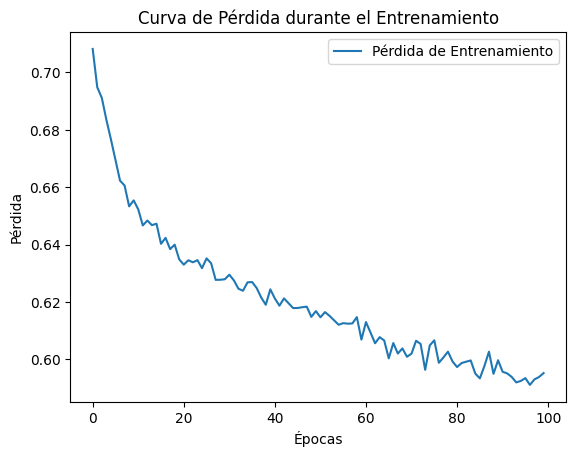

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt



# Generar la curva de pérdida de entrenamiento
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()
